# Check performance of selection function probabilities for Galaxia 3.
Create plots to compare spectroscopic sample recreated from selection function probabilities to original spectroscopic sample for Galaxia 3.

In [11]:
# autoreload modules when files have been altered
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy

import seaborn as sns
sns.set(font="serif",style="white")

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter
font = {'family' : 'serif', 'weight' : 'normal',
        'size'   : 30}

def ErrorWarning():
    raise ValueError("Wait, don't run this, you don't want to!")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Plot sky positions of spectroscopic samples

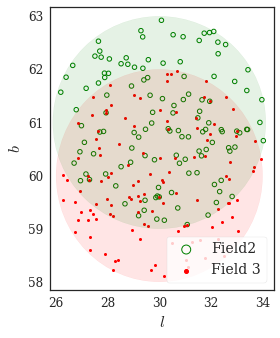

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

df23 = pd.read_csv('.../Galaxia3_df/photometric/solutionF23.csv')
survey = pd.read_csv('.../Galaxia3_sf/Galaxia3_sf_survey.csv')

survey2 = survey[survey.fieldID == 2.0]
survey3 = survey[survey.fieldID == 3.0]

con = np.pi/180
patch1 = matplotlib.patches.Ellipse((30, 60), 4/np.cos(60*con), 4, color='r', fill=True, alpha=0.1)
patch2 = matplotlib.patches.Ellipse((30, 61), 4/np.cos(61*con), 4, color='g', fill=True, alpha=0.1)

fig = plt.figure(figsize=(4,5.2))
ax = plt.subplot()

plt.scatter(survey3.glon/con, survey3.glat/con, label='Field2',
            marker='o', c='none', edgecolors='g', s=20, linewidths=1)
plt.scatter(survey2.glon/con, survey2.glat/con, label='Field 3',
            marker='o', c='r', edgecolors='r', s=4, linewidths=1)
#plt.scatter(df23.glon, df23.glat, c='k', s=0.1)

ax.add_artist(patch1)
ax.add_artist(patch2)

plt.rc('mathtext', fontset='cm')
plt.rc('font', family='serif')
plt.xlabel(r'$l$', fontsize=16, style='italic')
plt.ylabel(r'$b$', fontsize=16, style='italic')
plt.tick_params(axis='both', labelsize=12)

plt.legend(fontsize=14, frameon=True, markerscale=2)

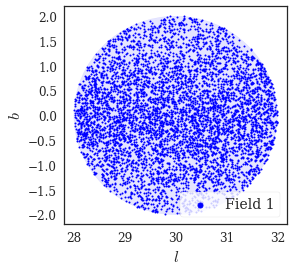

In [13]:
survey1 = survey[survey.fieldID == 1.0]

con = np.pi/180
patch1 = matplotlib.patches.Ellipse((30, 0), 4/np.cos(0*con), 4, color='b', fill=True, alpha=0.1)

fig = plt.figure(figsize=(4,4))
ax = plt.subplot()

plt.scatter(survey1.glon/con, survey1.glat/con, label='Field 1',
            marker='.', c='b', s=4, linewidths=1)

ax.add_artist(patch1)

plt.rc('mathtext', fontset='cm')
plt.rc('font', family='serif')
plt.xlabel(r'$l$', fontsize=16, style='italic')
plt.ylabel(r'$b$', fontsize=16, style='italic')
plt.tick_params(axis='both', labelsize=12)

plt.legend(fontsize=14, frameon=True, markerscale=5)

## 2. Read data

In [14]:
# Read in data and SF probabilities
survey = pd.read_csv('data/Galaxia3_sf/Galaxia3_sf_survey.csv')
survey1 = pd.read_csv('data/Galaxia3_sf/photometric/solutionS1.csv')
survey23 = pd.read_csv('data/Galaxia3_sf/photometric/solutionS23_c.csv')
df1 = pd.read_csv('data/Galaxia3_sf/photometric/solutionF1.csv')
df23 = pd.read_csv('data/Galaxia3_sf/photometric/solutionF23_c.csv')

In [5]:
# Have a look at the headers
survey.head()

,fieldID,ageGyr,mh,mass,s,glat,glon,Japp,Kapp,Happ
0,1.0,0.080206,0.131878,0.813452,0.204661,-0.001631,0.554703,11.383010,10.801089,10.872491
1,1.0,0.026443,0.064906,0.332448,0.250904,-0.008855,0.497925,13.376771,12.648386,12.820760
2,1.0,0.145908,0.003134,0.521813,0.347224,-0.002172,0.555960,14.057067,13.283819,13.406567
3,1.0,0.014928,-0.127462,0.378424,0.416372,-0.001150,0.540679,13.928348,13.158529,13.306347
4,1.0,0.010053,-0.117990,0.453687,0.489441,0.029985,0.508104,13.767147,12.965415,13.098343


In [6]:
df1.head()

,fieldID,ageGyr,mh,mass,s,glat,glon,Japp,Kapp,Happ,Colour,points,SFprob,field_info,union,union_obs
0,0,0.004104,-0.085650,0.155959,0.049795,0.017469,0.524398,9.548181,8.770376,9.003180,0.777805,[1.0],[0.08039684579912153],"[(0.08039684579912153, 1.0)]",0.080397,0.080397
1,0,0.088479,-0.165455,0.118675,0.044637,-0.011882,0.544987,12.127241,11.344277,11.574952,0.782964,[1.0],[0.9230460479365217],"[(0.9230460479365217, 1.0)]",0.923046,0.923046
2,0,0.040458,0.067671,0.149731,0.068558,-0.012353,0.493354,12.109066,11.334004,11.563305,0.775062,[1.0],[0.9036011009190215],"[(0.9036011009190215, 1.0)]",0.903601,0.903601
3,0,0.012034,0.077630,0.309852,0.063585,0.010114,0.521776,9.951744,9.198136,9.391868,0.753608,[1.0],[0.13594438108598986],"[(0.13594438108598986, 1.0)]",0.135944,0.135944
4,0,0.051441,0.111719,0.100125,0.096038,0.024153,0.541279,13.625847,12.863097,13.100820,0.762750,[1.0],[0.6019268974214603],"[(0.6019268974214603, 1.0)]",0.601927,0.601927


In [7]:
survey['Colour']   = survey.Japp-survey.Kapp
survey1['Colour']  = survey1.Japp-survey1.Kapp
survey23['Colour'] = survey23.Japp-survey23.Kapp
df1['Colour']      = df1.Japp-df1.Kapp
df23['Colour']     = df23.Japp-df23.Kapp

## 3. Plot colour-magnitude diagrams of photometric and spectroscopic samples

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'c', u'color'] which are all aliases for u'color'.  Kept value from u'color'
  seen=seen, canon=canonical, used=seen[-1]))


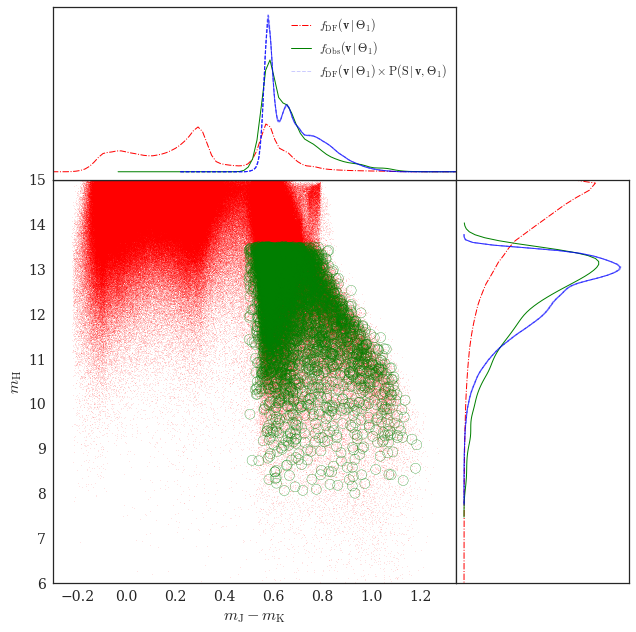

In [8]:
# Create plot

nullfmt = NullFormatter()         # no labels
font = {'family' : 'serif', 'weight' : 'normal',
        'size'   : 10}
legend = {'fontsize': 10}
matplotlib.rc('font', **font)
matplotlib.rc('legend', **legend)
matplotlib.rc('axes', labelsize= 10)

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

sml, big = (0.3, 0.7)
ax_c = plt.axes([0, 0, big, big])
ax_t = plt.axes([0, big, big, sml])
ax_s = plt.axes([big, 0., sml, big])

#xlim = (0, 13)
ylim = (6, 15)

# the scatter plot:
ax_c.scatter(df1.Colour, df1.Happ, s=0.01, c='r')
ax_c.scatter(survey1.Colour, survey1.Happ, s=100, marker='o', c='none', edgecolors='g')

#ax_c.set_xlim(xlim)
ax_c.set_ylim(ylim)

label1=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_1)$'
label2=r'$f_\mathrm{Obs}(\mathbf{v} \,|\,\Theta_1)$'
label3=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_1) \times \mathrm{P}(\mathrm{S}\,|\,\mathbf{v}, \Theta_1)$'

plt.sca(ax_t)
sns.kdeplot(df1.Colour, label=label1, alpha=1., c='r', legend=True, 
            linestyle='-.', linewidth=1)
sns.kdeplot(survey1.Colour, label=label2, alpha=1., c='g', legend=True, 
            linestyle='-', linewidth=1)

plt.sca(ax_s)
sns.kdeplot(df1.Happ, alpha=1., c='r', legend=False, vertical=True, linestyle='-.', 
            linewidth=1)
sns.kdeplot(survey1.Happ, alpha=1., c='g', legend=False, vertical=True, linestyle='-', 
            linewidth=1)

N=10
for i in range(N):
    df_rand = df1[np.random.rand(len(df1)) < df1.union][['Colour', 'Happ']].copy()
    
    kwargs = {'alpha':0.2, 'color':'b'}
    kwargs2 = {'alpha':0.2, 'color':'b'}
    if i==0:
        labelargs = {'label':label3, 'legend':True}
    else: 
        labelargs = {'legend':False}
    
    # Merge kwargs and labelargs
    kwargs.update(labelargs)
        
    plt.sca(ax_t)
    sns.kdeplot(df_rand.Colour, linestyle='--', linewidth=1, **kwargs)
    plt.sca(ax_s)
    sns.kdeplot(df_rand.Happ, legend=False, vertical=True, linestyle='--', linewidth=1,
                **kwargs2)
    
ax_t.set_xlim(ax_c.get_xlim())
ax_s.set_ylim(ax_c.get_ylim())

ax_c.tick_params('x', labelsize=14)
ax_c.tick_params('y', labelsize=14)
ax_s.tick_params('both', which='both', bottom='off', labelbottom='off', left='off', 
                 labelleft='off')
ax_t.tick_params('both', which='both', bottom='off', labelbottom='off', left='off', 
                 labelleft='off')

ax_c.set_xlabel(r'$m_\mathrm{J} - m_\mathrm{K}$', fontsize=16)
ax_c.set_ylabel(r'$m_\mathrm{H}$', fontsize=16)

plt.setp(ax_t.get_legend().get_texts(), fontsize='12') 

plt.show()

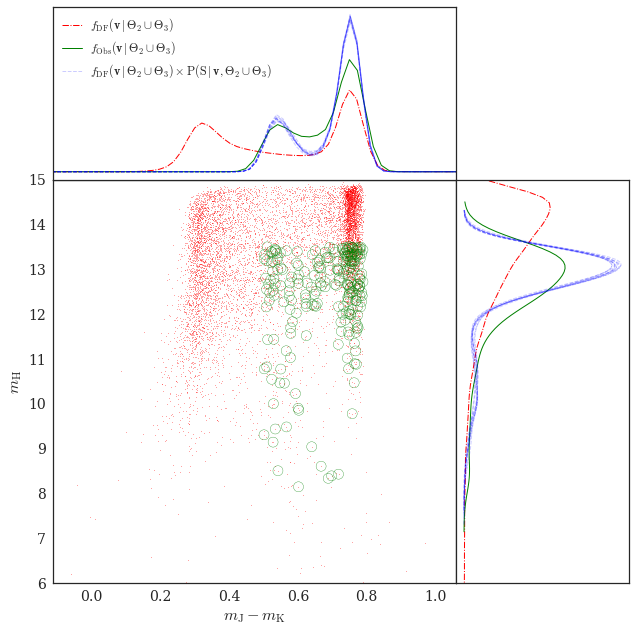

In [9]:
nullfmt = NullFormatter()         # no labels
font = {'family' : 'serif', 'weight' : 'normal',
        'size'   : 10}
legend = {'fontsize': 10}
matplotlib.rc('font', **font)
matplotlib.rc('legend', **legend)
matplotlib.rc('axes', labelsize= 10)

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

sml, big = (0.3, 0.7)
ax_c = plt.axes([0, 0, big, big])
ax_t = plt.axes([0, big, big, sml])
ax_s = plt.axes([big, 0., sml, big])

#xlim = (0, 13)
ylim = (6, 15)

# the scatter plot:
ax_c.scatter(df23.Colour, df23.Happ, s=0.1, c='r')
ax_c.scatter(survey23.Colour, survey23.Happ, s=100, marker='o', c='none', edgecolors='g')

#ax_c.set_xlim(xlim)
ax_c.set_ylim(ylim)

label1=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_2 \cup \Theta_3)$'
label2=r'$f_\mathrm{Obs}(\mathbf{v} \,|\,\Theta_2 \cup \Theta_3)$'
label3=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_2 \cup \Theta_3) \times \mathrm{P}(\mathrm{S}\,|\,\mathbf{v}, \Theta_2 \cup \Theta_3)$'

plt.sca(ax_t)
sns.kdeplot(df23.Colour, label=label1, alpha=1., c='r', legend=True, linestyle='-.', 
            linewidth=1)
sns.kdeplot(survey23.Colour, label=label2, alpha=1., c='g', legend=True, linestyle='-',
            linewidth=1)

plt.sca(ax_s)
sns.kdeplot(df23.Happ, alpha=1., c='r', legend=False, vertical=True, linestyle='-.', 
            linewidth=1)
sns.kdeplot(survey23.Happ, alpha=1., c='g', legend=False, vertical=True, linestyle='-',
            linewidth=1)

N=10
for i in range(N):
    df_rand = df23[np.random.rand(len(df23)) < df23.union][['Colour', 'Happ']].copy()
    
    kwargs = {'alpha':0.2, 'color':'b'}
    kwargs2 = {'alpha':0.2, 'color':'b'}
    if i==0:
        labelargs = {'label':label3, 'legend':True}
    else: 
        labelargs = {'legend':False}
    
    # Merge kwargs and labelargs
    kwargs.update(labelargs)
        
    plt.sca(ax_t)
    sns.kdeplot(df_rand.Colour, linestyle='--', linewidth=1, **kwargs)
    plt.sca(ax_s)
    sns.kdeplot(df_rand.Happ, legend=False, vertical=True, linestyle='--', linewidth=1,
                **kwargs2)
    
ax_t.set_xlim(ax_c.get_xlim())
ax_s.set_ylim(ax_c.get_ylim())

ax_c.tick_params('x', labelsize=14)
ax_c.tick_params('y', labelsize=14)
ax_s.tick_params('both', which='both', bottom='off', labelbottom='off', left='off', 
                 labelleft='off')
ax_t.tick_params('both', which='both', bottom='off', labelbottom='off', left='off', 
                 labelleft='off')

ax_c.set_xlabel(r'$m_\mathrm{J} - m_\mathrm{K}$', fontsize=16)
ax_c.set_ylabel(r'$m_\mathrm{H}$', fontsize=16)

plt.setp(ax_t.get_legend().get_texts(), fontsize='12') 

plt.show()

## 4. Plot age-metallicity-mass-distance diagrams of photometric and spectroscopic samples

In [ ]:
def kde(df, survey, coord, ax, xlabel={}, xlim={}, fs=50, legend=True,
        label1=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_1)$',
        label2=r'$f_\mathrm{Obs}(\mathbf{v} \,|\,\Theta_1)$',
        label3=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_1) \times \mathrm{P}(\mathrm{S}\,|\,\mathbf{v}, \Theta_1)$'
       ):
  
    plt.sca(ax)

    sns.kdeplot(df[coord], label=label1, alpha=1., c='r', legend=legend, linestyle='-.', linewidth=2)
    sns.kdeplot(survey[coord], label=label2, alpha=1., c='g', legend=legend,linestyle='-', linewidth=3)

    N=10
    for i in range(N):
        df_rand = df[np.random.rand(len(df)) < df.union][[coord]].copy()

        kwargs = {'alpha':0.2, 'color':'b'}
        if i==0: labelargs = {'label':label3,\
                              'legend':legend}
        else: labelargs = {'legend':False}
        sns.kdeplot(df_rand[coord], **kwargs, **labelargs, linestyle='--', linewidth=2)

    plt.xlim(xlim[coord])
    plt.xlabel(xlabel[coord], fontsize=fs)
    plt.ylabel(ylabel[coord], fontsize=fs)
    if legend: plt.setp(ax.get_legend().get_texts(), fontsize=fs) 

    plt.tick_params('both', labelsize=20)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30,20))

xlabel = {'mass':r'$\mathcal{M}$ ($\mathrm{M}_\odot$)', 'ageGyr':r'$\tau$ (Gyr)', \
          'mh':r'[M/H] (dex)','s':r'$s$ (kpc)'}
ylabel = {'mass':r'PDF ($\mathrm{M}_\odot^{-1}$)', 'ageGyr':r'PDF ($\mathrm{Gyr}^{-1}$)',\
          'mh':r'PDF ($\mathrm{dex}^{-1}$)', 's':r'PDF ($\mathrm{kpc}^{-1}$)'}
xlim = {'mass':(0,4), 'ageGyr':(0,13), 'mh':(-1.5, 1.0), 's':(0,16)}
coords = ['ageGyr', 'mh', 'mass', 's']

label1=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_1)$'
label2=r'$f_\mathrm{Obs}(\mathbf{v} \,|\,\Theta_1)$'
label3=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_1) \times \mathrm{P}(\mathrm{S}\,|\,\mathbf{v}, \Theta_1)$'

kwargs = {'xlabel':xlabel, 'xlim':xlim, 'fs':30, 'label1':label1, 'label2':label2, 'label3':label3}

#survey1 = survey[survey.fieldID==1.0]
kde(df1, survey1, coords[0], ax[0,0], **kwargs)
kde(df1, survey1, coords[1], ax[0,1], **kwargs, legend=False)
kde(df1, survey1, coords[2], ax[1,0], **kwargs, legend=False)
kde(df1, survey1, coords[3], ax[1,1], **kwargs, legend=False)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30,20))

xlabel = {'mass':r'$\mathcal{M}$ ($\mathrm{M}_\odot$)', 'ageGyr':r'$\tau$ (Gyr)', \
          'mh':r'[M/H] (dex)','s':r'$s$ (kpc)'}
ylabel = {'mass':r'PDF ($\mathrm{M}_\odot^{-1}$)', 'ageGyr':r'PDF ($\mathrm{Gyr}^{-1}$)',\
          'mh':r'PDF ($\mathrm{dex}^{-1}$)', 's':r'PDF ($\mathrm{kpc}^{-1}$)'}
xlim = {'mass':(0,4), 'ageGyr':(0,13), 'mh':(-1.5, 1.0), 's':(0,16)}
coords = ['ageGyr', 'mh', 'mass', 's']

label1=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_2 \cup \Theta_3)$'
label2=r'$f_\mathrm{Obs}(\mathbf{v} \,|\,\Theta_2 \cup \Theta_3)$'
label3=r'$f_\mathrm{DF}(\mathbf{v} \,|\,\Theta_2 \cup \Theta_3) \times \mathrm{P}(\mathrm{S}\,|\,\mathbf{v}, \Theta_2 \cup \Theta_3)$'

kwargs = {'xlabel':xlabel, 'xlim':xlim, 'fs':30, 'label1':label1, 'label2':label2, 'label3':label3}

kde(df23, survey23, coords[0], ax[0,0], **kwargs)
kde(df23, survey23, coords[1], ax[0,1], **kwargs, legend=False)
kde(df23, survey23, coords[2], ax[1,0], **kwargs, legend=False)
kde(df23, survey23, coords[3], ax[1,1], **kwargs, legend=False)